In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winequality-white.csv
/kaggle/input/winequality-red.csv


In [2]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
import numpy as np  
import plotly.graph_objects as go

from sklearn.cluster import KMeans 
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA  
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('/kaggle/input/winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## **Data Understanding**

In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.duplicated().sum()

240

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## **Data preparation and visualization**

In [8]:
df=df.drop_duplicates(keep=False)
df.shape

(1139, 12)

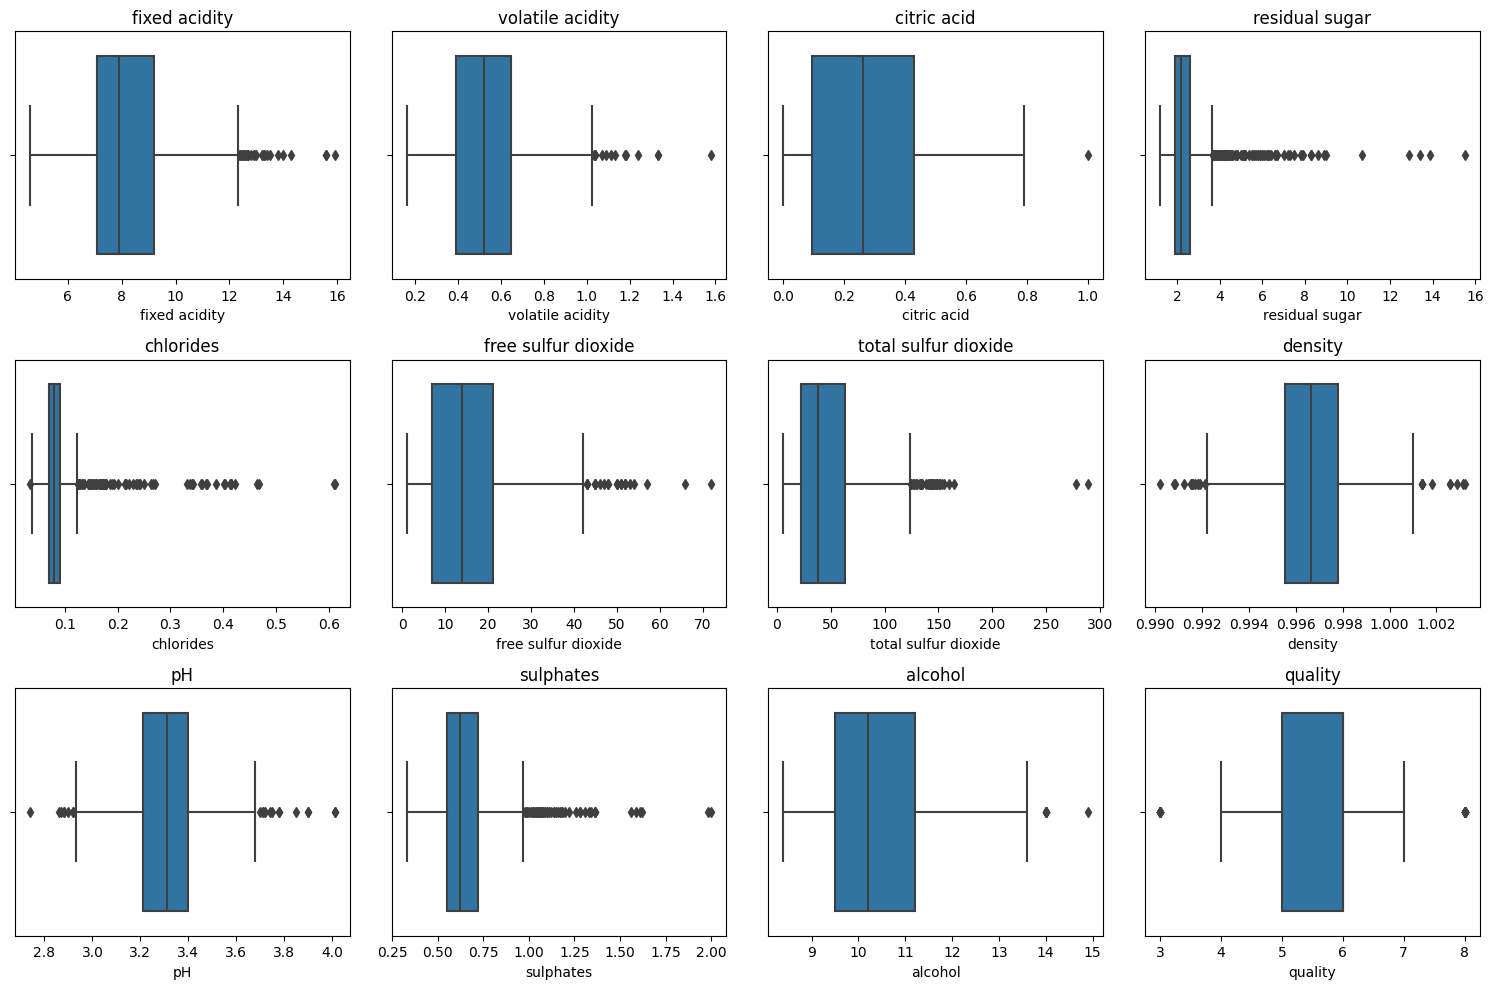

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

for i, coluna in enumerate(df.columns):
    
    linha = i // 4  
    col = i % 4    
    
    sns.boxplot(x=df[coluna], ax=axs[linha, col])
    axs[linha, col].set_title(coluna)  

plt.tight_layout() 
plt.show()

In [10]:
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    is_outlier = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    # Replace outliers with the median of the column
    median_value = df[column].median()
    df.loc[is_outlier, column] = median_value

# Apply to all columns
for col in df.columns:
    replace_outliers_with_median(df, col)

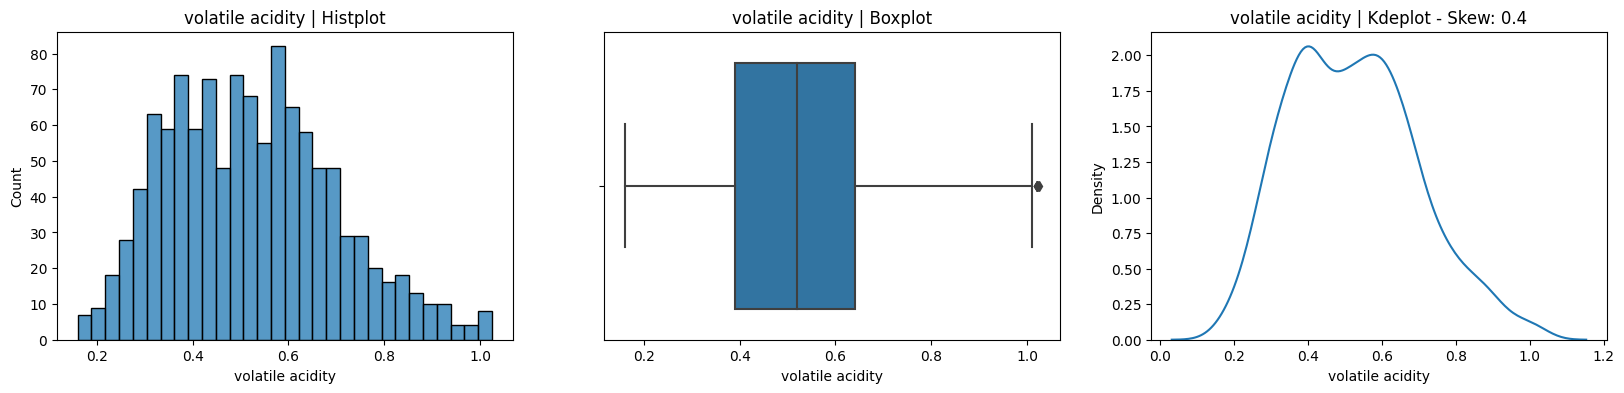

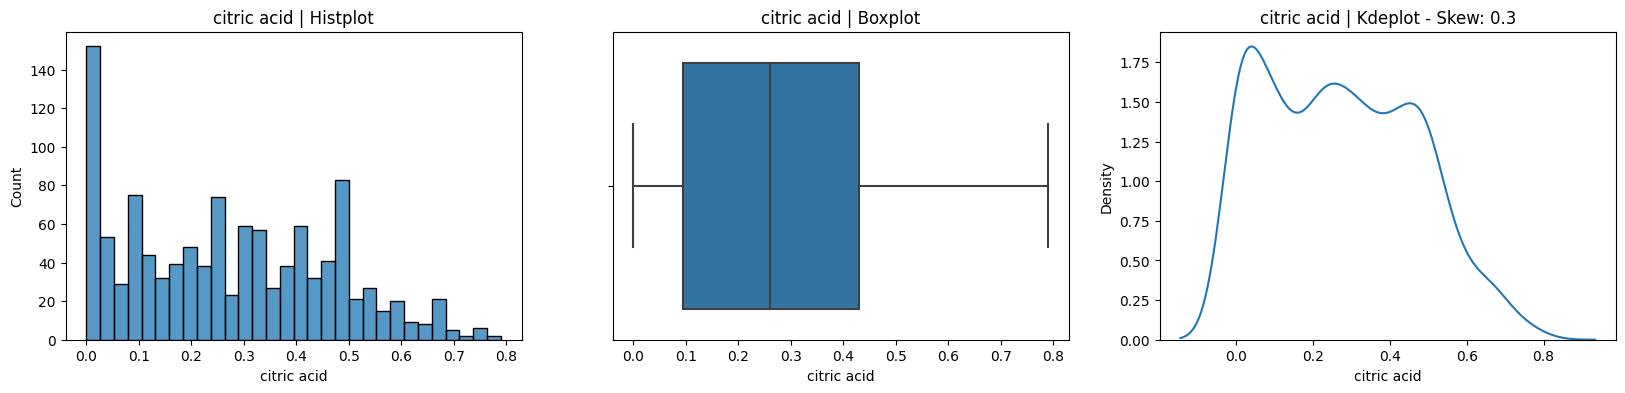

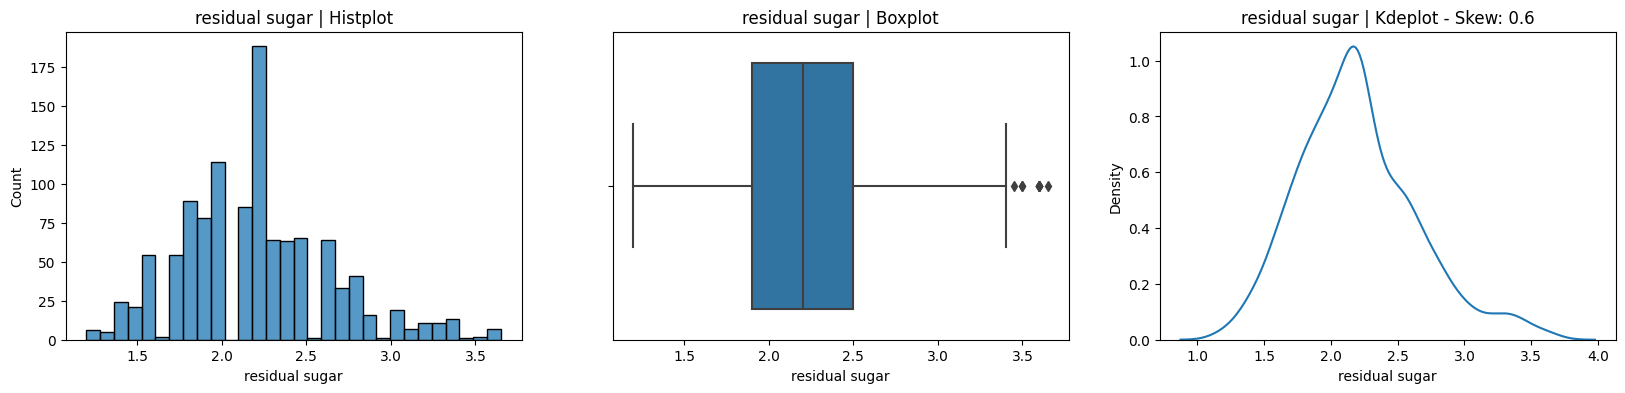

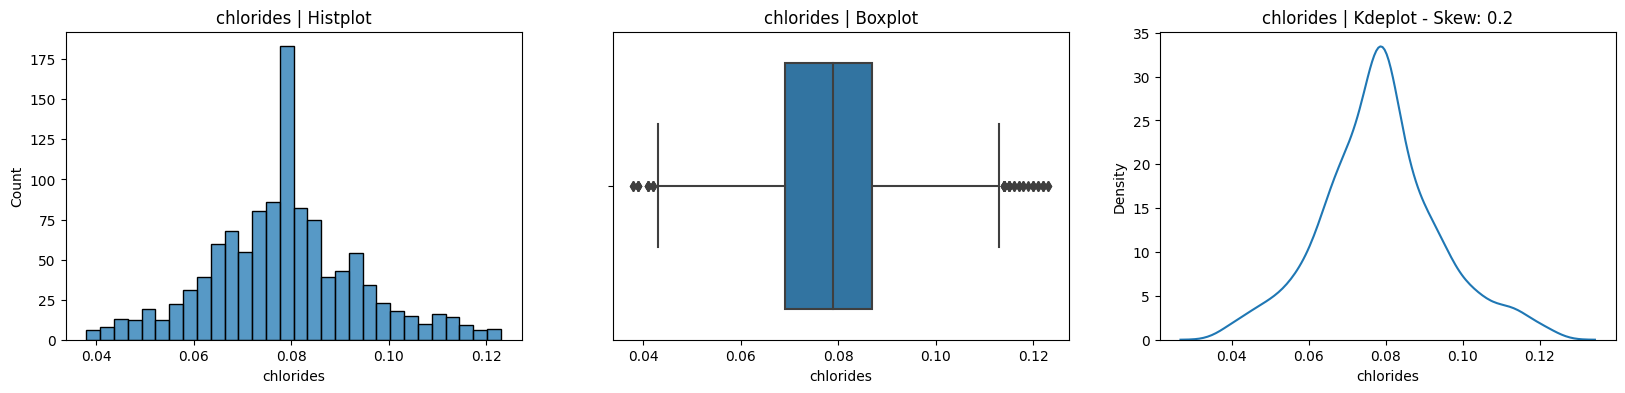

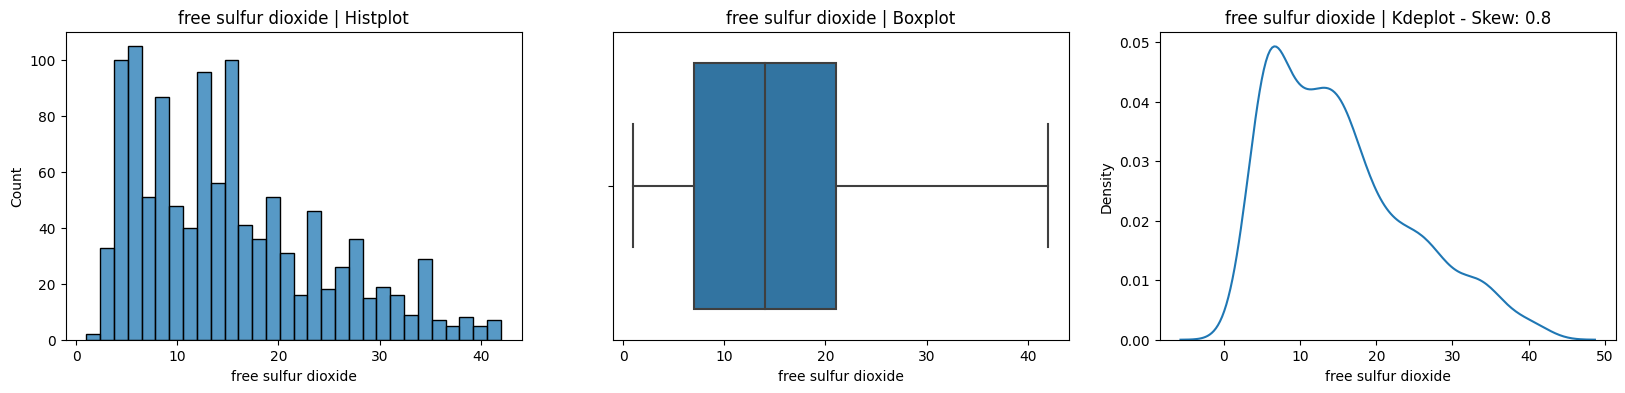

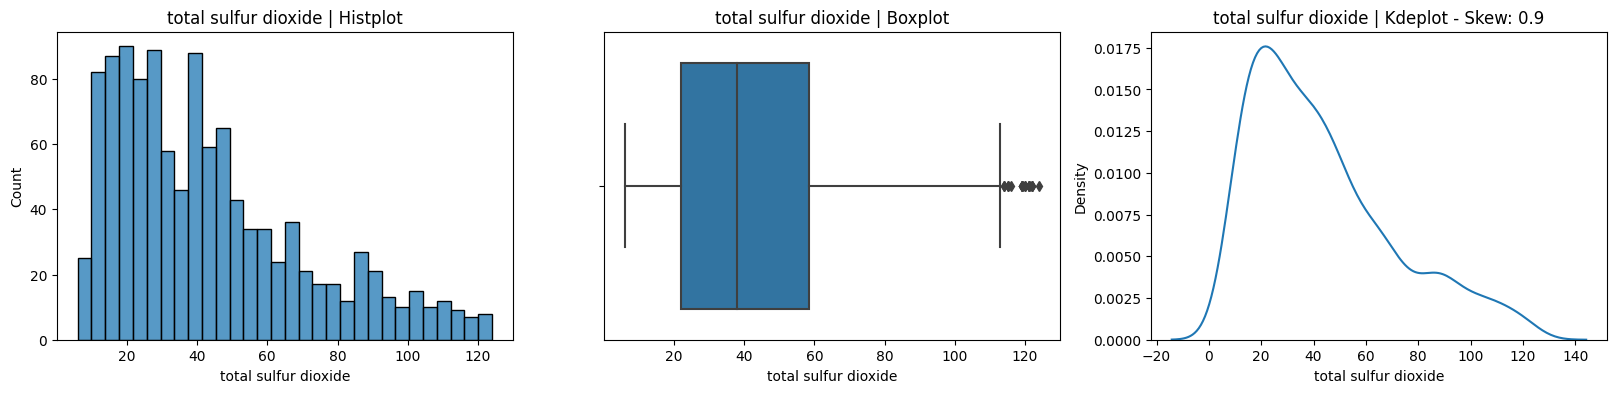

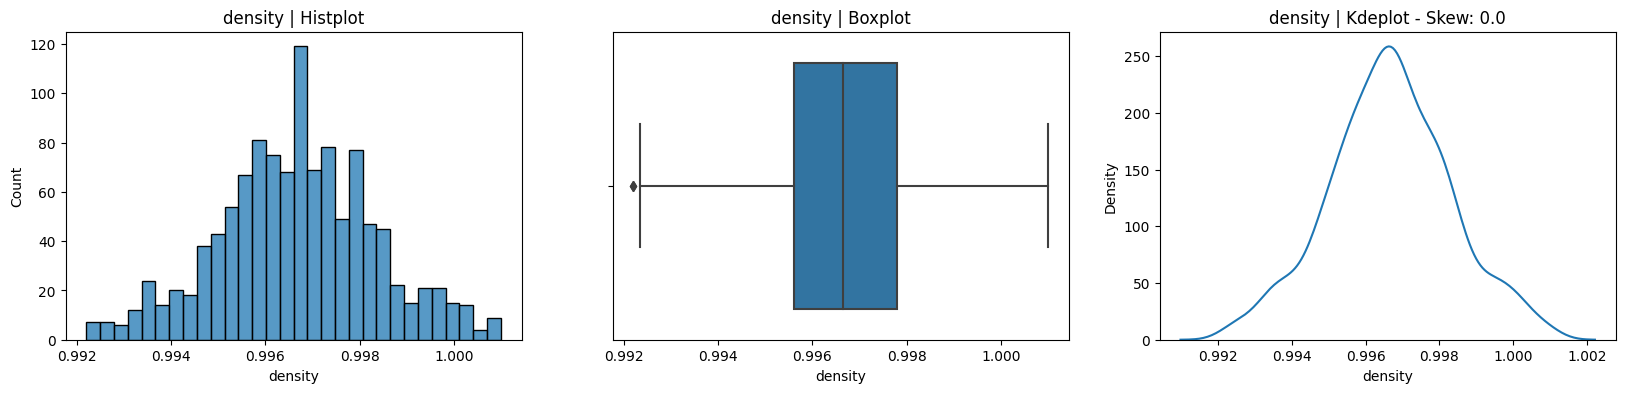

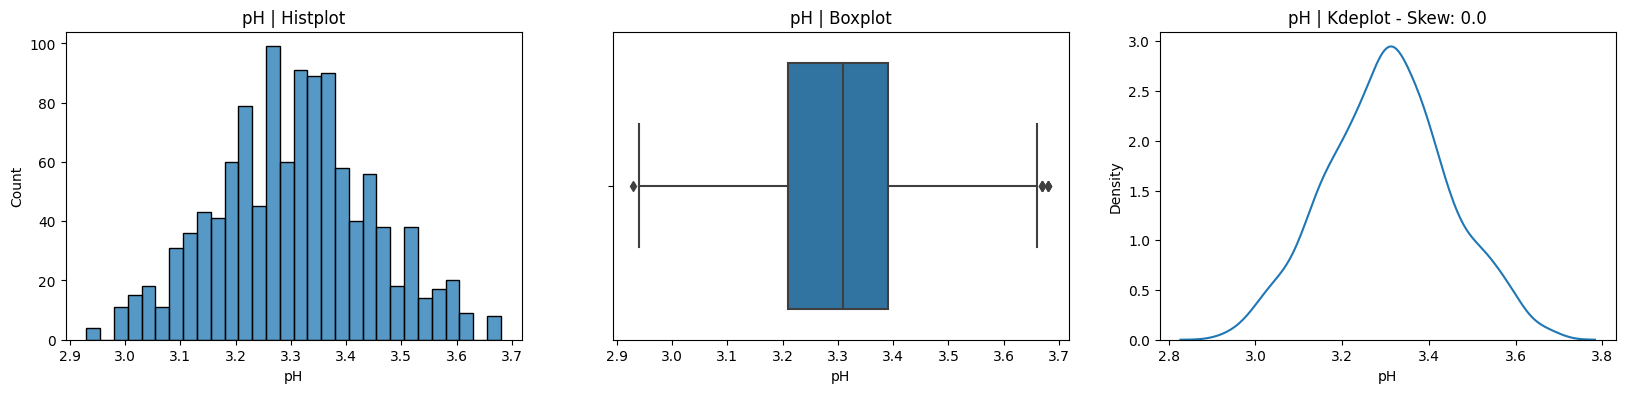

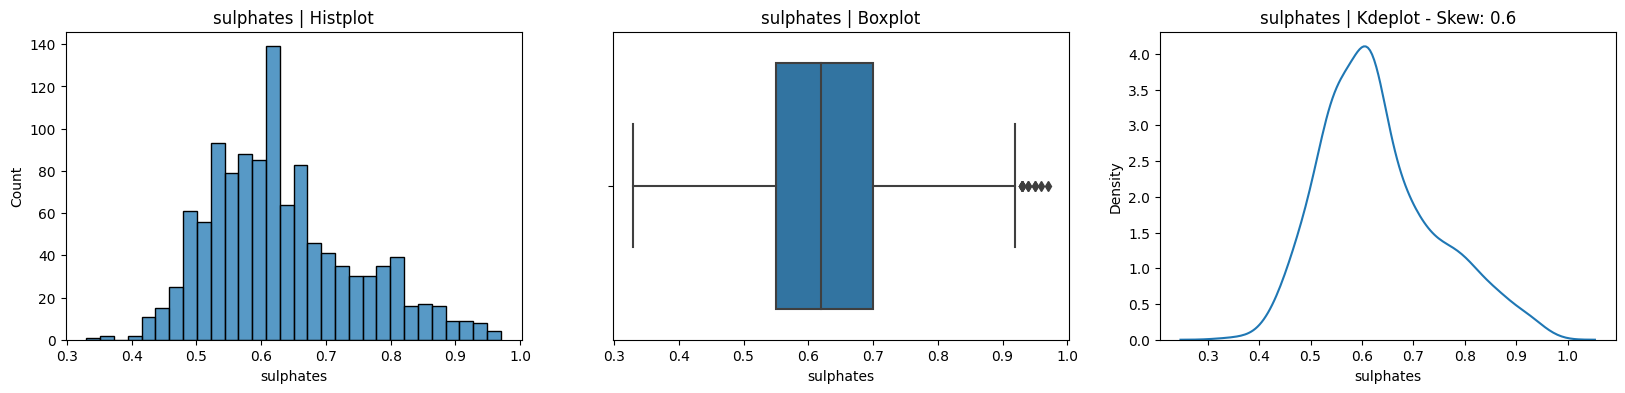

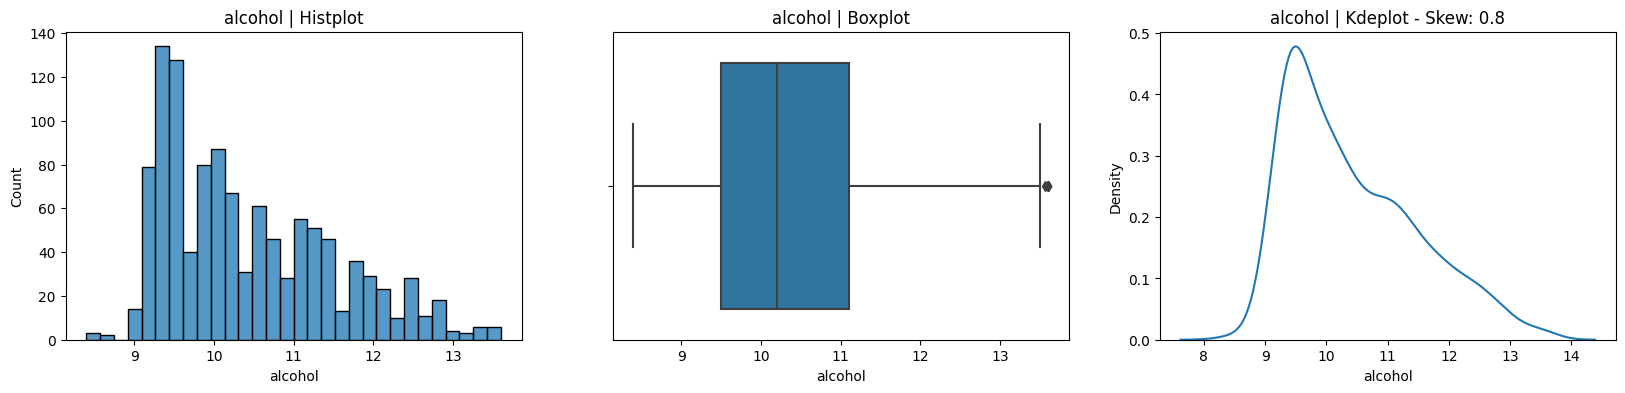

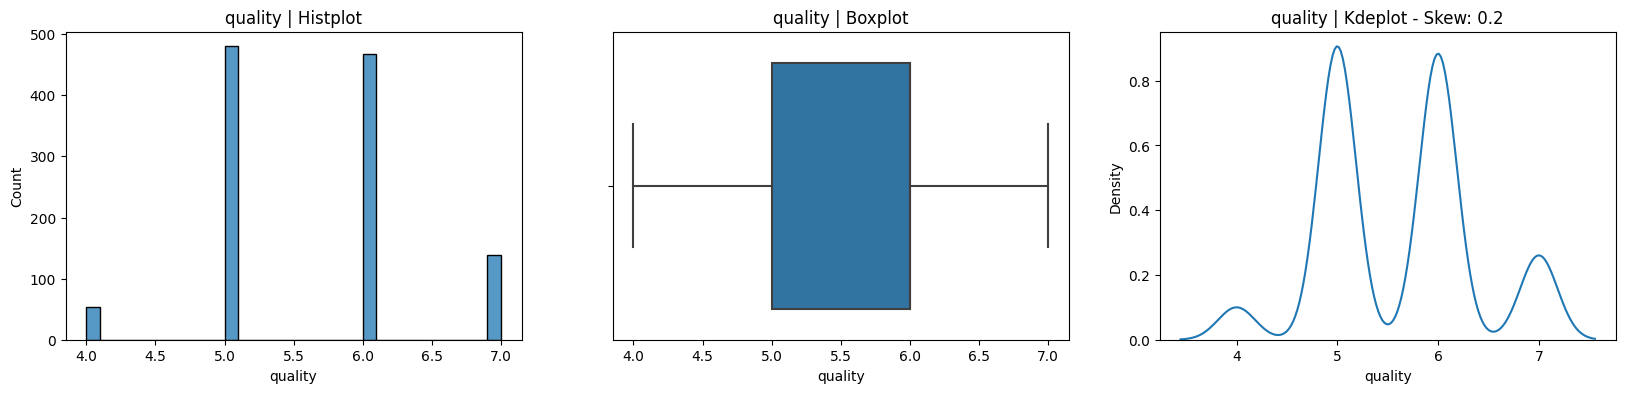

In [11]:
for i in df.columns[1:]:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=df[i],ax=ax[0], bins=30)
    sns.boxplot(x=df[i], ax=ax[1])
    sns.kdeplot(df[i], ax=ax[2])
    skew_val=round(df[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

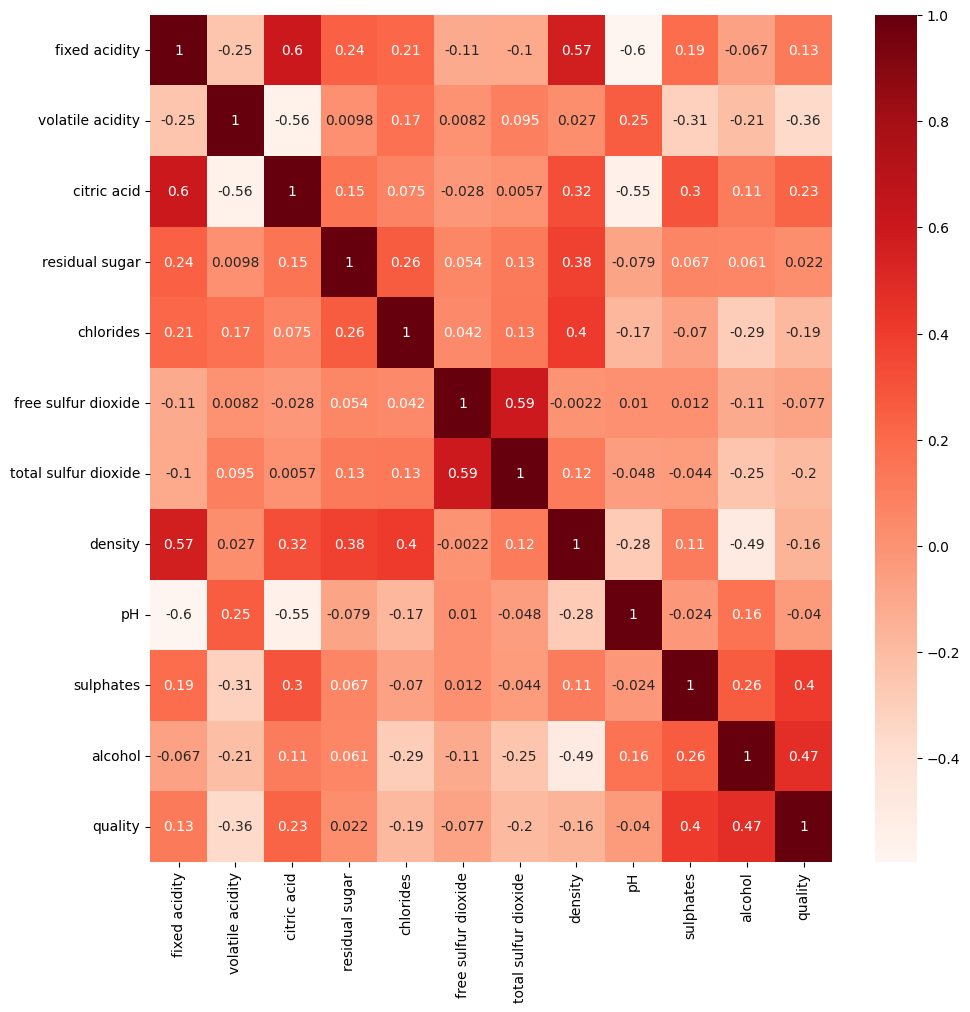

In [12]:
plt.figure(figsize=(11,11))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## **Elbow Method**

In [13]:
scores_list = []
k_range = range(1,10)
for k in k_range:
  kmeans_model = KMeans(n_clusters= k)
  kmeans_model.fit(df)
  #append scores of kmeans_model
  scores_list.append(kmeans_model.inertia_)

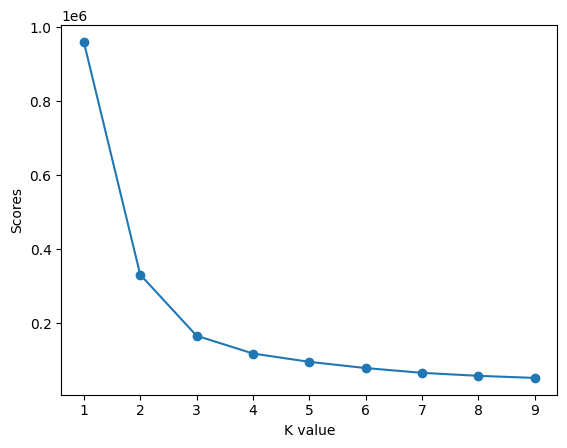

In [14]:
#plot elbow method
plt.plot(k_range, scores_list, marker = 'o')
plt.xlabel('K value')
plt.ylabel('Scores')
plt.show()

## **PCA**

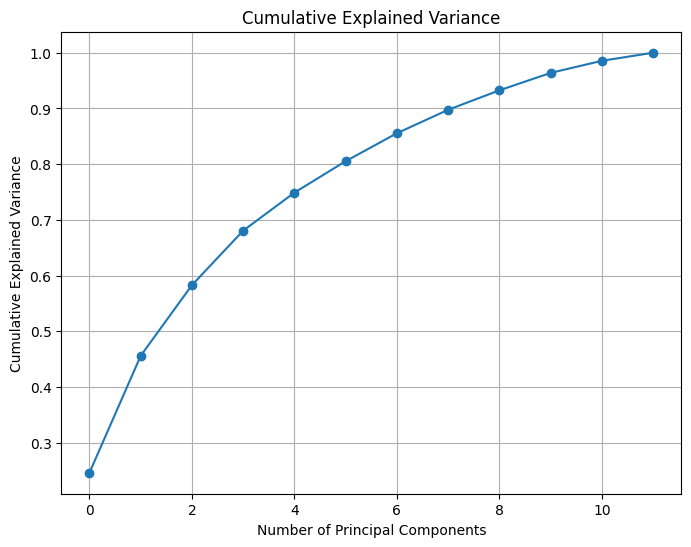

Explained Variance Ratio of Principal Components:
[0.2459191  0.20990953 0.12691626 0.0977724  0.06831734 0.05640524
 0.05018014 0.04213296 0.03490794 0.03130695 0.02171194 0.0145202 ]


In [15]:

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Print explained variance ratio
print("Explained Variance Ratio of Principal Components:")
print(pca.explained_variance_ratio_)

In [16]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(8)])

# Print the PCA DataFrame
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.695364,-2.434254,0.599683,1.149391,0.105478,0.962166,1.193576,0.638005
1,-0.749113,-1.692084,-0.346883,0.594434,-0.245833,0.580089,0.590587,0.467719
2,2.641872,-0.063212,0.324842,-1.690374,0.051141,-0.209752,0.109664,-0.720701
3,-1.937275,-1.203932,-0.841629,-0.058007,-1.154512,-0.511631,-0.025029,-0.419435
4,-1.586483,-1.189169,-0.389217,-1.668512,0.024585,-0.229113,0.412006,-0.488253


## **Kmeans Model**

In [17]:
kmeans_model = KMeans(n_clusters = 4)
kmeans_model.fit(pca_df)
label = kmeans_model.predict(pca_df)

In [18]:
fig = go.Figure()

# Colors for clusters
colors = ['magenta', 'blue', 'red', 'green']

# Plotting data points for each cluster
for i in range(4):
    cluster_data = pca_df[label == i]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['PC1'],
        y=cluster_data['PC2'],
        z=cluster_data['PC3'],
        mode='markers',
        marker=dict(size=5, color=colors[i]),
        name=f'Cluster {i + 1}'
    ))

# Plotting cluster centroids
centroids = kmeans_model.cluster_centers_
fig.add_trace(go.Scatter3d(
    x=centroids[:, 0],
    y=centroids[:, 1],
    z=centroids[:, 2],
    mode='markers+text',
    marker=dict(size=10, color='black', symbol='x'),
    text=['Centroid']*centroids.shape[0],
    textposition='top center',
    name='Centroids'
))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    title='3D Scatter Plot of PCA Components with Clusters',
    legend=dict(x=0, y=1)
)

# Show plot
fig.show()

In [29]:
df['cluster_kmean'] = label
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster,cluster_kmean
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,3,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1,1


## **supervised test**

In [28]:
X_kmean = df.drop('cluster_kmean', axis=1)
y_kmean = df['cluster_kmean']

# Generate a random dataset
X_kmean, y_kmean = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.90
